## Name: Tile Joy Dooshima
## SID: 2277419

In [1]:
#Importing time to check the time it takes to run this code, results at the bottom
import time
start_time = time.time()

# Diabetes Mega Case Study

### IMPORT LIBRARIES

In [2]:
#Install Light Gradient Boosting Model
!pip install lightgbm

In [3]:
#Installing scikit optimize library
!pip install scikit-optimize

In [4]:
# Import the necessary general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Importing the modelling libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
import scipy.stats as stats

#Importing LightGBM
from lightgbm import LGBMClassifier

#Importing the evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, precision_score

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

### IMPORT DATASET

In [5]:
# Reading the datain using pandas dataframe
diabetes = pd.read_csv('diabetes-2-1.csv')

In [6]:
# Looking at the first 5 rows of our dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## DATA EXPLORATION

### Looking at data characteristics

In [7]:
# Checking the basic information about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Examining the basic characteristics of the dataset
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Addressing zero values

From the cell above, we can see that the minimum values for variables Glucose, BloodPressure, SkinThickness, Insulin, & BMI is 0. Given the context of this dataset, they should count as missing values.

In [9]:
# Counting 0s as missing values for variables Glucose, BloodPressure, SkinThickness, Insulin, & BMI
diabetes[diabetes == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
#Replacing 0s with np.nan
diabetes.iloc[:,1:8] = diabetes.iloc[:,1:8].replace(0, np.nan)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
# Checking the count of the missing values
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Checking the percentage of missing values per feature
print("\nColumn Name              % of Null Values\n")
print((diabetes.isnull().sum())/768*100)


Column Name              % of Null Values

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


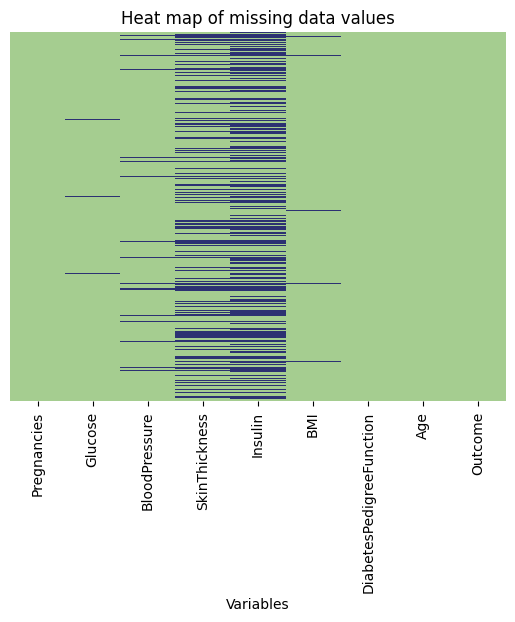

In [13]:
sns.heatmap(diabetes.isnull(),  yticklabels=False, cbar=False, cmap='crest')
plt.title('Heat map of missing data values')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.show()

### Exploratory Data Analysis

In [14]:
#Checking the count of the patients per class in our Outcome variable
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

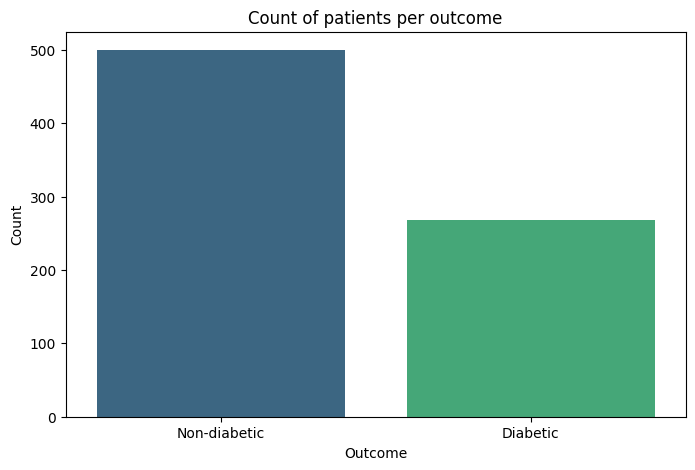

In [15]:
#Visualizing the outcome of the patients in the dataset
fig = plt.figure(figsize=(8,5))
g = fig.add_gridspec(1,1)
ax = fig.add_subplot(g[0,0])
sns.countplot(data=diabetes, x = 'Outcome', ax= ax, palette = 'viridis')

ax.set_xlabel("Outcome")
ax.set_ylabel("Count")
ax.set_xticklabels(["Non-diabetic","Diabetic"])
plt.title('Count of patients per outcome')
plt.show()

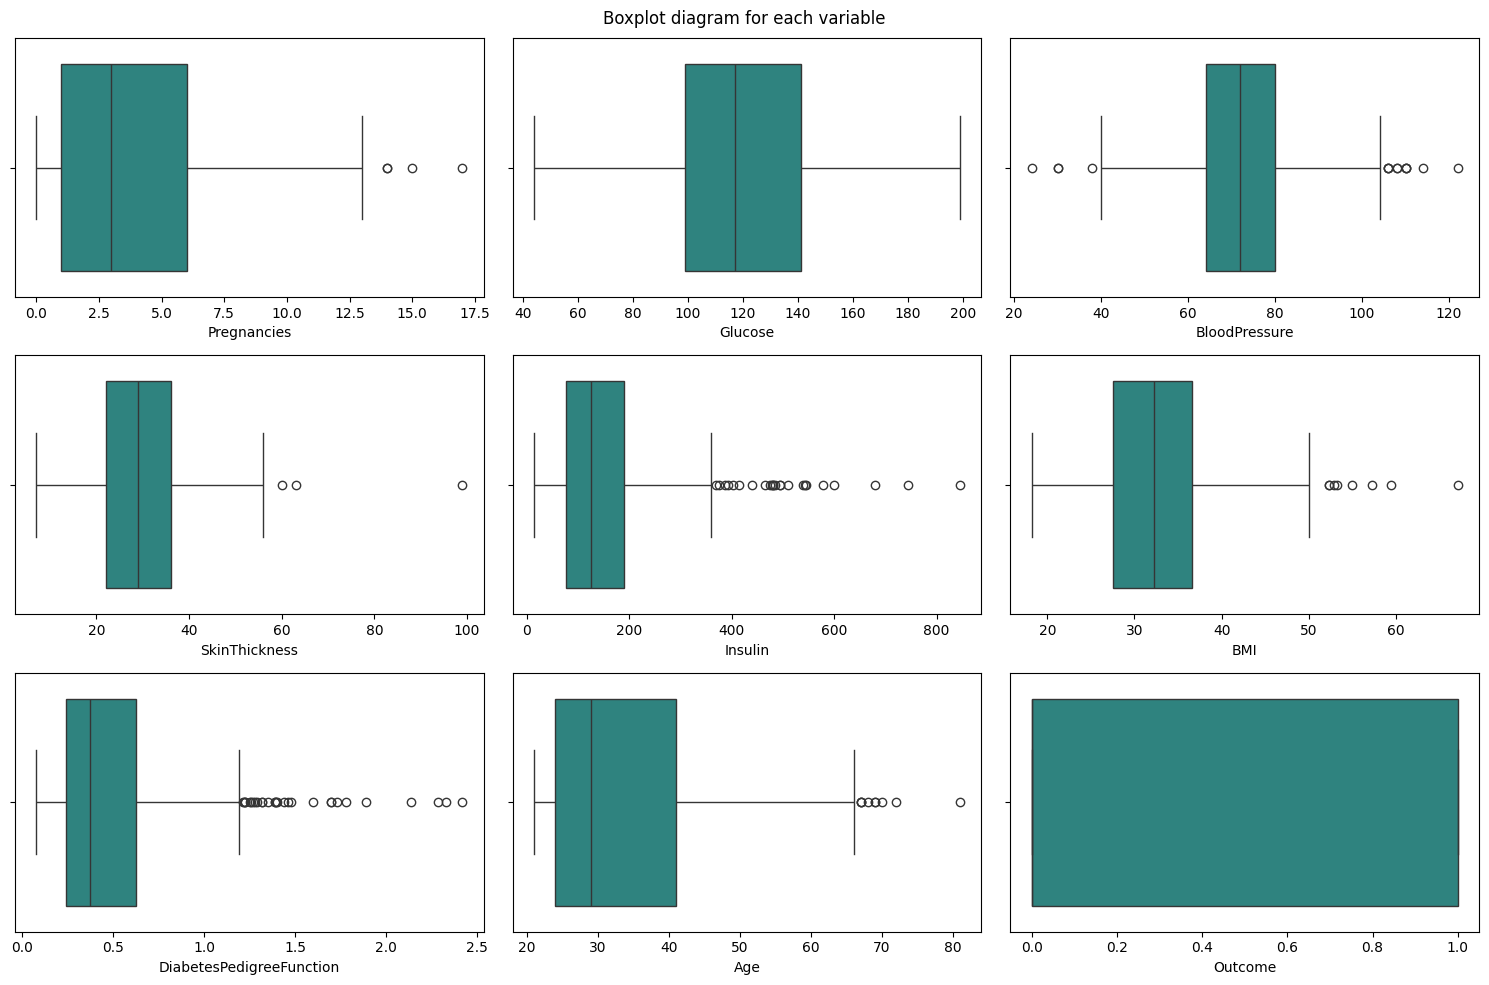

In [16]:
#Looking at the summarized description of each variable using the boxenplot
fig1, axes = plt.subplots(3,3, figsize = (15,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(diabetes.columns):
    sns.boxplot(diabetes, x=diabetes[column],ax = axes[i//3,i%3], palette='viridis')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig1.suptitle('Boxplot diagram for each variable')
plt.tight_layout()
plt.show()

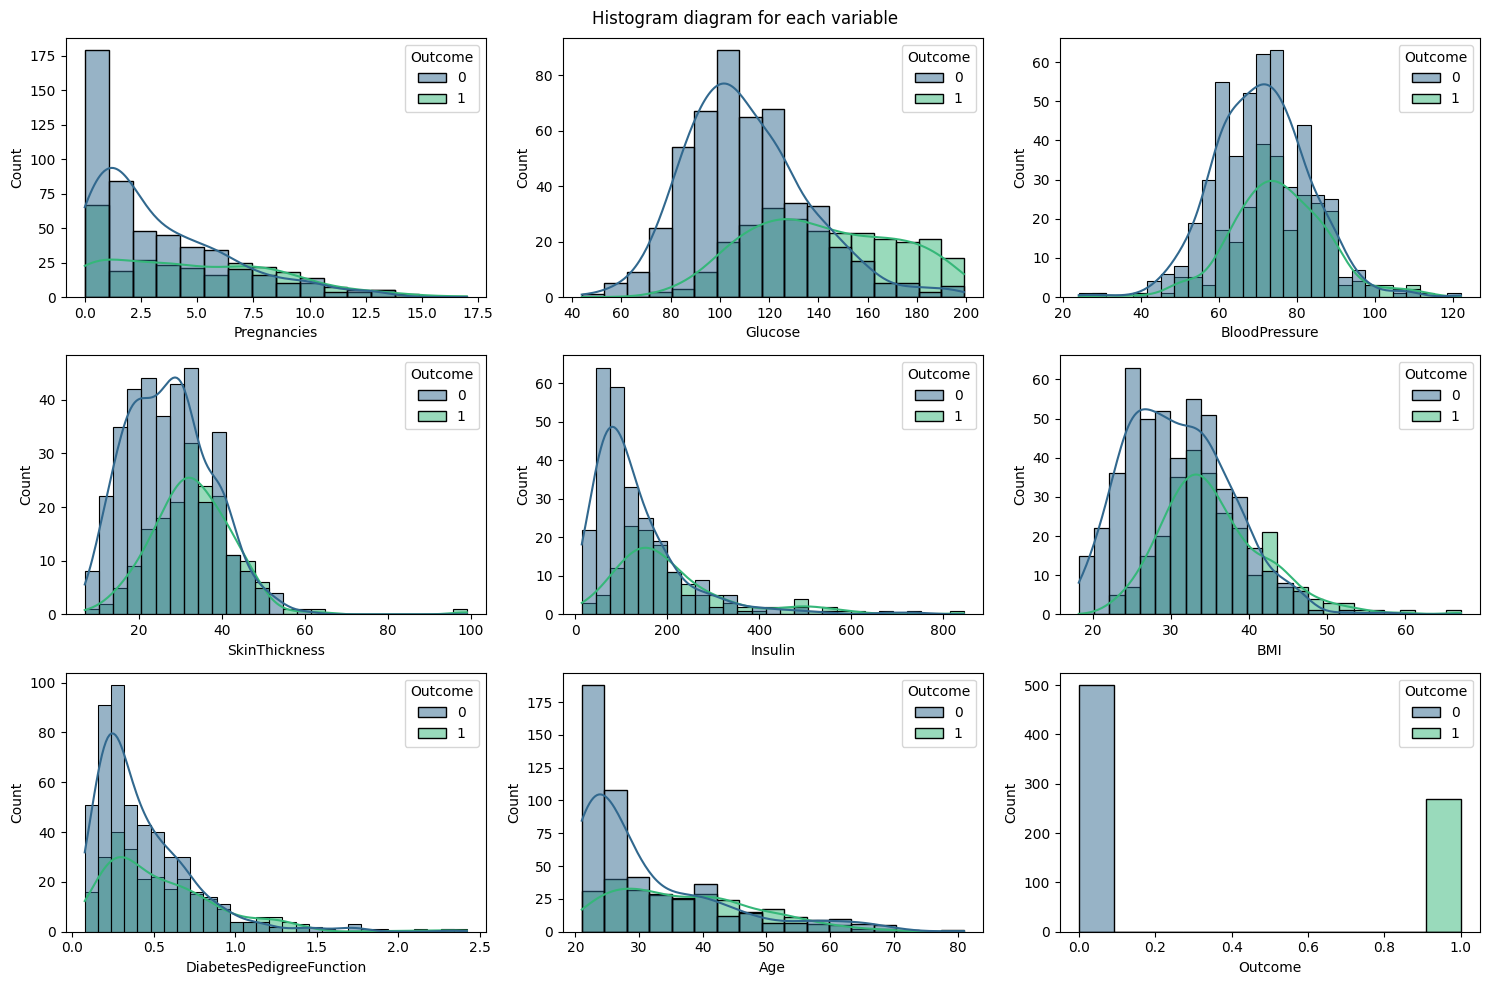

In [17]:
# Showing the distribution for each variable
fig, axes = plt.subplots(3,3, figsize = (15,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(diabetes.columns):
    sns.histplot(diabetes, x=diabetes[column], ax = axes[i//3,i%3], kde=True, hue=diabetes['Outcome'], palette='viridis')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig.suptitle('Histogram diagram for each variable')
plt.tight_layout()
plt.show()

In [18]:
# Displaying the minimum and maximum values for each variable
diabetes.describe().loc[['min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0.0,44.0,24.0,7.0,14.0,18.2,0.078,21.0,0.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.420,81.0,1.0


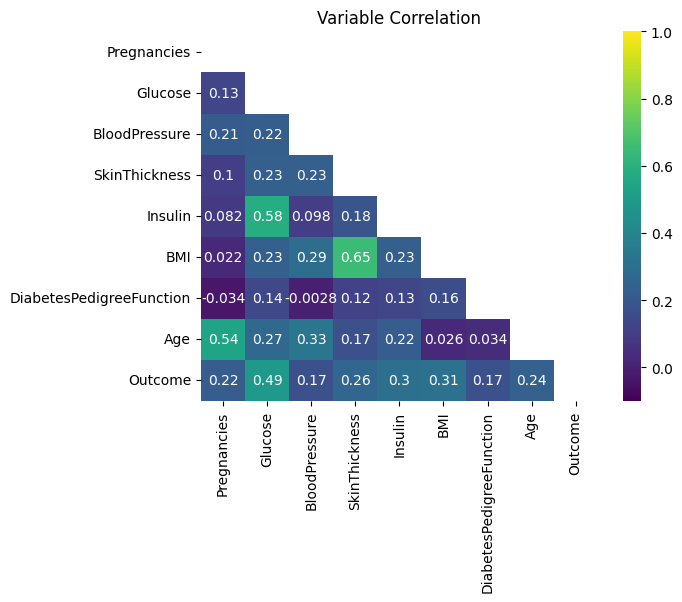

In [19]:
#Plotting a heatmap of the correlation between the features
mask = np.triu(np.ones_like(diabetes.corr()))
sns.heatmap(diabetes.corr(), annot=True, cmap='viridis', vmin=-0.1, vmax=1, mask = mask)
plt.title('Variable Correlation')
plt.show()

Findings and decisions made:

*   There are 500 non-diabetic patients and 268 diabetic patients indicating a slightly imbalanced target variable.

*   **Finding**: Glucose has just a few values missing and the distribution as shown by the histogram roughly resembles a normal distribution. Also the box plot for glucose indicates that it doesn't have outliers
***Decision**: It would make sense to use **mean imputation** to deal with Glucose missing values

*   **Finding**: BMI has about 11 missing values. The distribution as shown by the histogram roughly resembles a normal distribution as well however there are a few more outliers
***Decision**: I am going with median imputation for the missing values

*   **Finding**: BloodPressure has more missing values, however the current distribution is almost normal with a few outliers
***Decision**: I am going with median imputation for the missing values.

*   **Finding**: The other 2 variables with missing features are SkinThickness and Insulin. These variables have almost half of their data points missing so it won't be ideal to go with mean or median imputation.

*   **Finding**: The heatmap above shows how much each feature correlates with one another.
Note: The correlation coefficients are calculated without the missing values.

*   **Finding**: While there aren't apparent linear correlation between the variables, Skin thickness is most correlated with BMI and Insulin is most correlated with Glucose.

*   **Finding**: Insulin and DiabetesPedigreeFunction are very much left skewed






## DATA PRE-PROCESSING

### Imputing Missing Values

Calling train_test_split on my data before performing any preprocessing in order to prevent data leakage in my validation data

In [20]:
#Splitting into train and test sets only, not including X and y components

train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=1)

In [21]:
train_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
663,9,145.0,80.0,46.0,130.0,37.9,0.637,40,1
712,10,129.0,62.0,36.0,NaN,41.2,0.441,38,1
161,7,102.0,74.0,40.0,105.0,37.2,0.204,45,0
509,8,120.0,78.0,NaN,NaN,25.0,0.409,64,0
305,2,120.0,76.0,37.0,105.0,39.7,0.215,29,0


Having split my data into training and testing set, I will proceed to deal with the missing values

In [22]:
#Creating a function for the entire cleaning process
def clean(set):

    # Making use of a column transformer to apply the imputation methods to the first 3 missing features
    imputer = ColumnTransformer(
        transformers=[
            ('mean', SimpleImputer(missing_values=np.nan, strategy='mean'), ['Glucose']),
            ('median', SimpleImputer(missing_values=np.nan, strategy='median'), ['BMI', 'BloodPressure'])
        ],
       remainder='passthrough'  # This will pass through other columns not specified in this transformer
    )

    training = imputer.fit_transform(set)

    # Recreating the dataframe after initial imputation
    training2 = pd.DataFrame(training, columns=[ 'Glucose', 'BMI', 'BloodPressure', 'Pregnancies', 'SkinThickness', 'Insulin',
          'DiabetesPedigreeFunction', 'Age', 'Outcome'])


    # Imputing the missing values for the last 2 missing features
    imputer2 = ColumnTransformer(
        transformers=[
             ('knnreg', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), missing_values=np.nan),
             [ 'Glucose', 'BMI', 'BloodPressure', 'Pregnancies', 'SkinThickness', 'Insulin',
          'DiabetesPedigreeFunction', 'Age']) # Passing just the predictor components to the imputer
        ],
        remainder='passthrough') # This will pass through the outcome and not include it in the regression

    # Building a pipeline for imputing the values
    cleaning_pipeline = Pipeline(steps=[
        ('imputer2', imputer2)])


    cleaned_training= cleaning_pipeline.fit_transform(training2)
    return cleaned_training

#Applying the function to the training set
training_set = clean(train_set)

In [23]:
print(training_set)

[[145.     37.9    80.    ...   0.637  40.      1.   ]
 [129.     41.2    62.    ...   0.441  38.      1.   ]
 [102.     37.2    74.    ...   0.204  45.      0.   ]
 ...
 [126.     43.4    90.    ...   0.583  42.      1.   ]
 [171.     43.6    72.    ...   0.479  26.      1.   ]
 [102.     32.9    76.    ...   0.665  46.      1.   ]]


In [24]:
#Checking for null values in the training set
np.isnan(training_set).sum()

0

In [25]:
#Converting my training set back into a dataframe using a function
def convert(X):
    imputed_training = pd.DataFrame(X, columns=[ 'Glucose', 'BMI', 'BloodPressure', 'Pregnancies', 'SkinThickness', 'Insulin',
          'DiabetesPedigreeFunction', 'Age', 'Outcome'])
    return imputed_training

imputed_train_set = convert(training_set)

In [26]:
# Looking at the first 5 rows of our training dataset
imputed_train_set.head()

,Glucose,BMI,BloodPressure,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,145.0,37.9,80.0,9.0,46.0,130.0,0.637,40.0,1.0
1,129.0,41.2,62.0,10.0,36.0,176.4,0.441,38.0,1.0
2,102.0,37.2,74.0,7.0,40.0,105.0,0.204,45.0,0.0
3,120.0,25.0,78.0,8.0,21.4,257.4,0.409,64.0,0.0
4,120.0,39.7,76.0,2.0,37.0,105.0,0.215,29.0,0.0


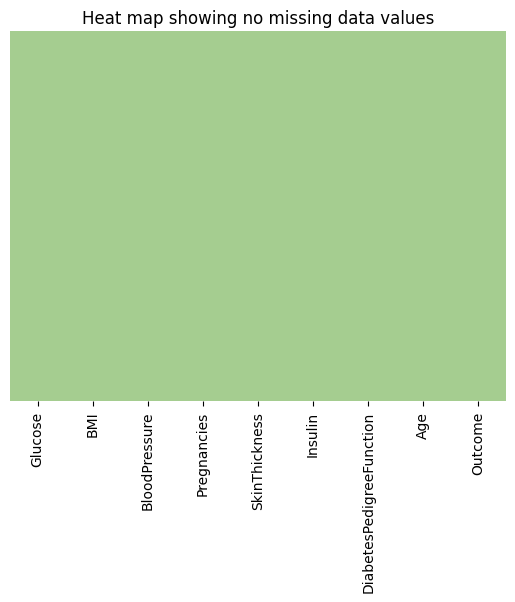

In [27]:
#Checking missing values once more
sns.heatmap(imputed_train_set.isnull(),  yticklabels=False, cbar=False, cmap='crest')
plt.title('Heat map showing no missing data values')
plt.show()

### Handling Outliers

Features like Pregnancies, BloodPressure, SkinThickness, Insulin and Glucose have unusually high/low data points and they will be replaced by specific percentiles.

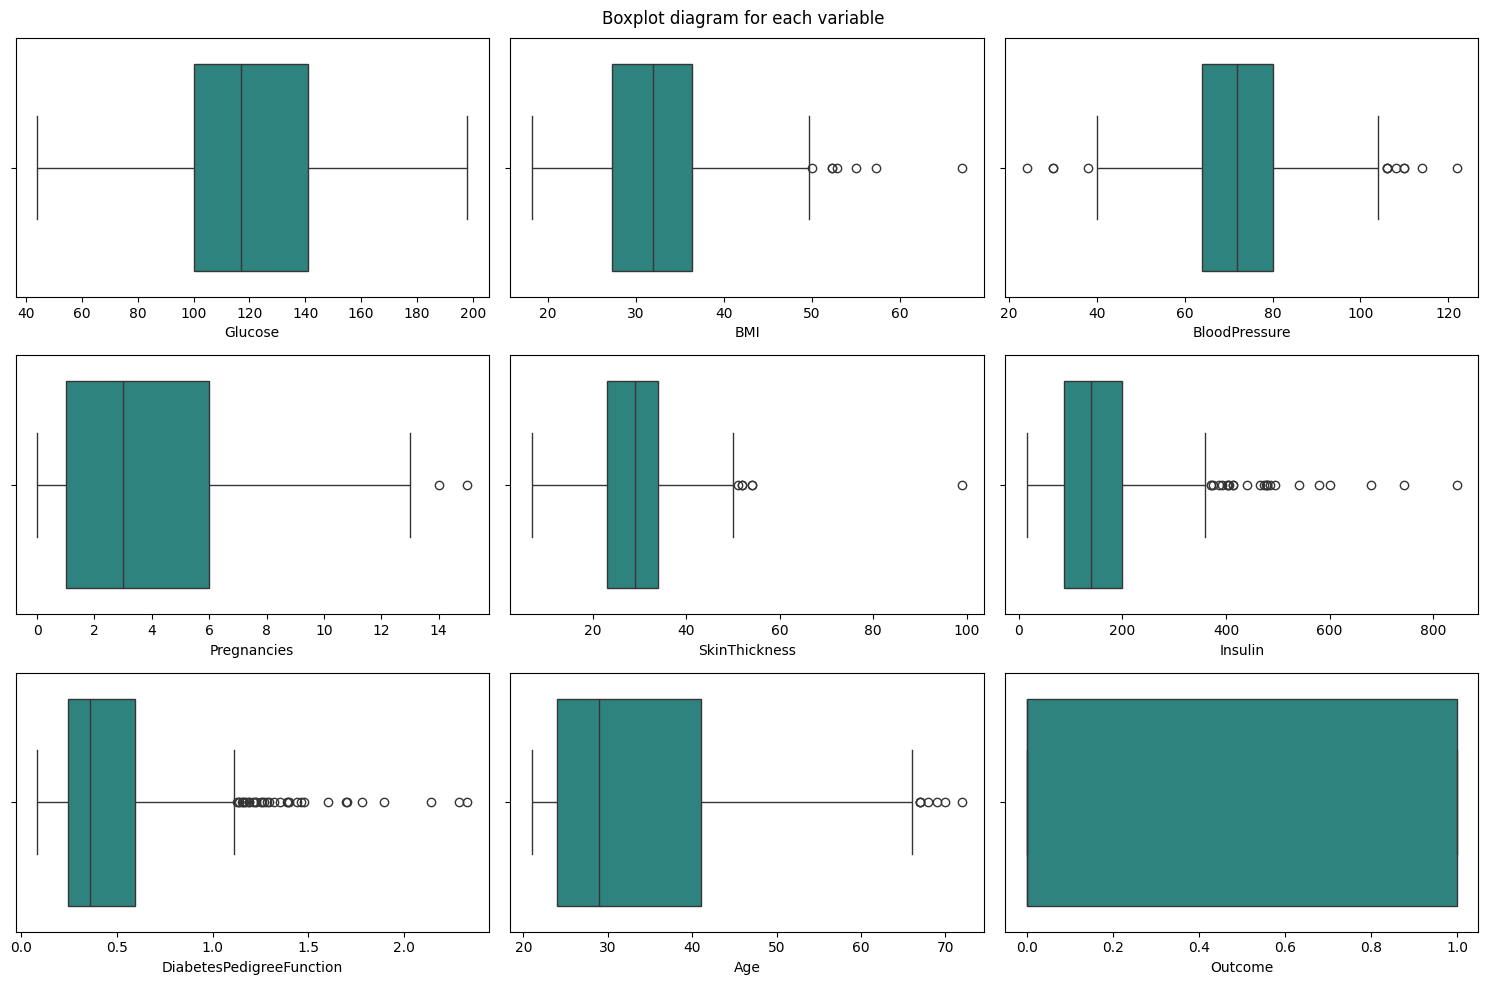

In [28]:
#Looking at the boxplot to see the outliers in the training set
fig1, axes = plt.subplots(3,3, figsize = (15,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(imputed_train_set.columns):
    sns.boxplot(imputed_train_set, x=imputed_train_set[column],ax = axes[i//3,i%3], palette='viridis')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig1.suptitle('Boxplot diagram for each variable')
plt.tight_layout()
plt.show()

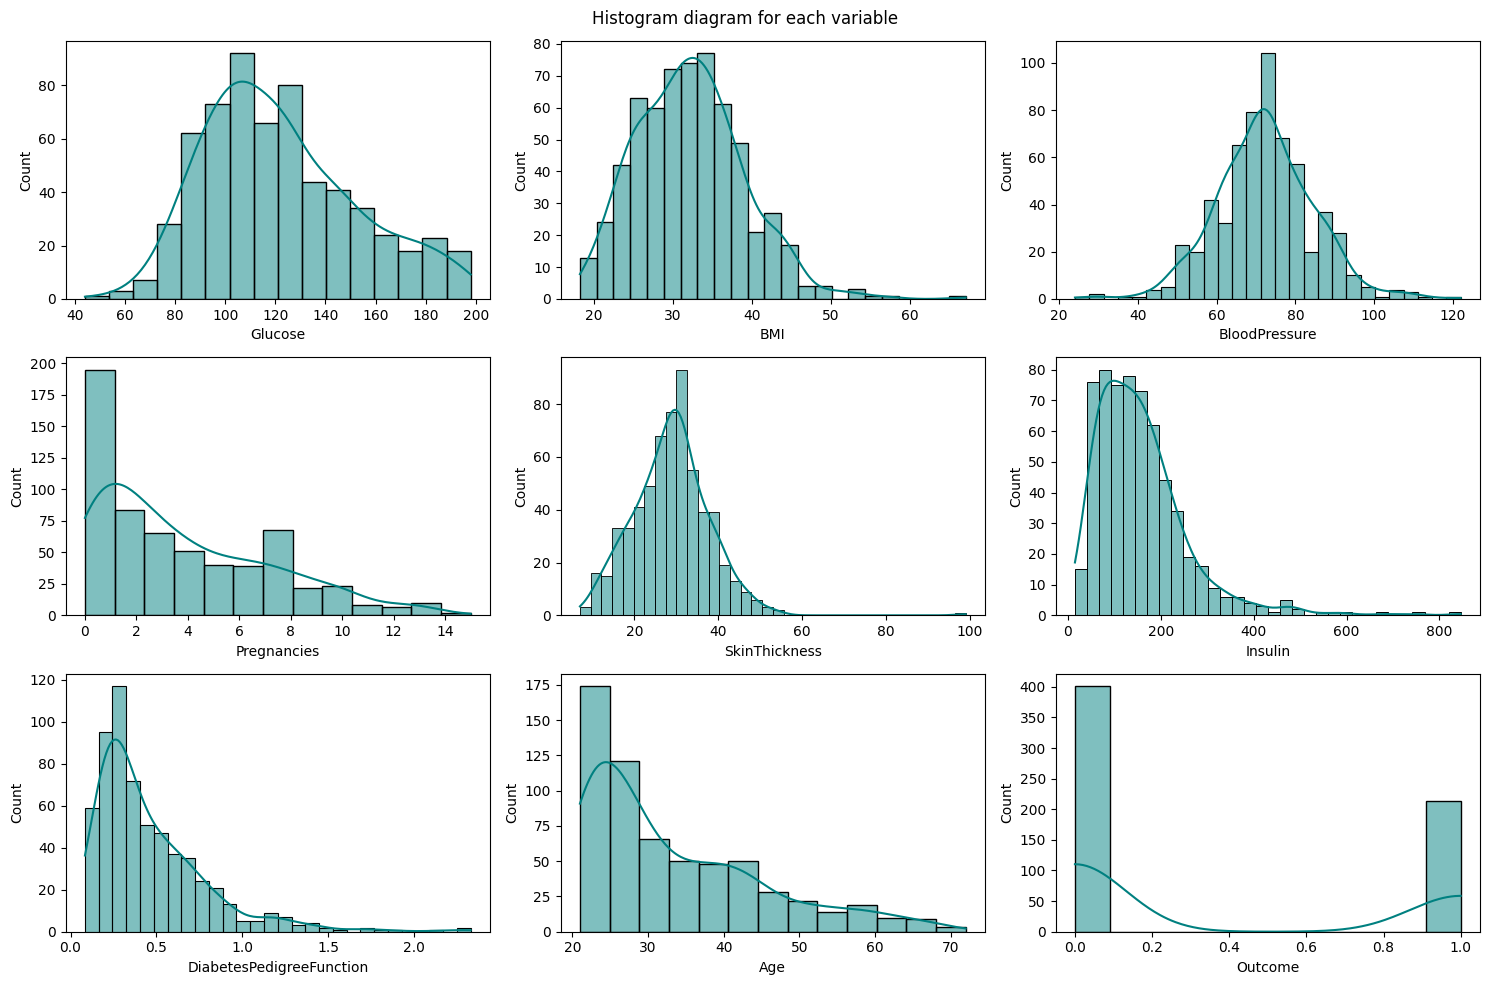

In [29]:
# Showing the distributions for the training set
fig, axes = plt.subplots(3,3, figsize = (15,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(imputed_train_set.columns):
    sns.histplot(imputed_train_set, x=imputed_train_set[column], ax = axes[i//3,i%3], kde=True, color='teal')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig.suptitle('Histogram diagram for each variable')
plt.tight_layout()
plt.show()

In [30]:
#Function to adjust the outliers
def outliers(col):
    #Setting the limits for Blood Pressure and Glucose
    lower_percentile = np.percentile(col, 1)
    upper_percentile = np.percentile(col, 99)

    #Setting the limits for the other 3 variables
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)

    # Applying the different limits to the columns
    if col.name is 'BloodPressure':
        return np.clip(col, a_min=lower_percentile, a_max=upper_percentile)
    elif col.name is 'Glucose':
        return np.clip(col, a_min=lower_percentile, a_max=None)
    elif col.name is 'Pregnancies':
        return np.clip(col, a_min=None, a_max=int(upper_limit)) #Accounting for the fact that pregnancies can only be integers
    elif (col.name is 'SkinThickness') or (col.name is 'Insulin'):
        return np.clip(col, a_min=None, a_max=upper_limit)
    else:
        return col

In [31]:
# def winsorize(col, lower_percentile=5, upper_percentile=95):

#   lower_bound = np.percentile(col, lower_percentile)
#   upper_bound = np.percentile(col, upper_percentile)

#   return np.clip(col, a_min=lower_bound, a_max=upper_bound)
#       #winsorize(data[col], lower_percentile, upper_percentile)



# train_set[['Glucose', 'BMI', 'BloodPressure', 'Pregnancies', 'SkinThickness',
#        'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] = train_set[['Glucose', 'BMI', 'BloodPressure', 'Pregnancies', 'SkinThickness',
#        'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].apply(winsorize)
# train_set.head()

In [32]:
#Adjusting outliers in the training dataset with the function created
imputed_train_set[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'Glucose']] = imputed_train_set[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'Glucose']].apply(outliers, axis=0)

In [33]:
#Looking at the summary information of the output dataset
imputed_train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose,614.0,121.943906,30.312137,68.000,100.00000,117.0000,141.0000,198.000
BMI,614.0,32.197231,6.820572,18.200,27.30000,32.0000,36.3750,67.100
BloodPressure,614.0,72.301303,11.963052,44.000,64.00000,72.0000,80.0000,106.000
Pregnancies,614.0,3.861564,3.373255,0.000,1.00000,3.0000,6.0000,13.000
SkinThickness,614.0,28.688274,8.645741,7.000,23.00000,29.0000,34.0000,50.500
Insulin,614.0,152.222150,82.761508,15.000,87.00000,138.6000,198.3000,365.250
DiabetesPedigreeFunction,614.0,0.463795,0.327362,0.084,0.24425,0.3615,0.5965,2.329
Age,614.0,33.298046,11.810249,21.000,24.00000,29.0000,41.0000,72.000
Outcome,614.0,0.346906,0.476373,0.000,0.00000,0.0000,1.0000,1.000


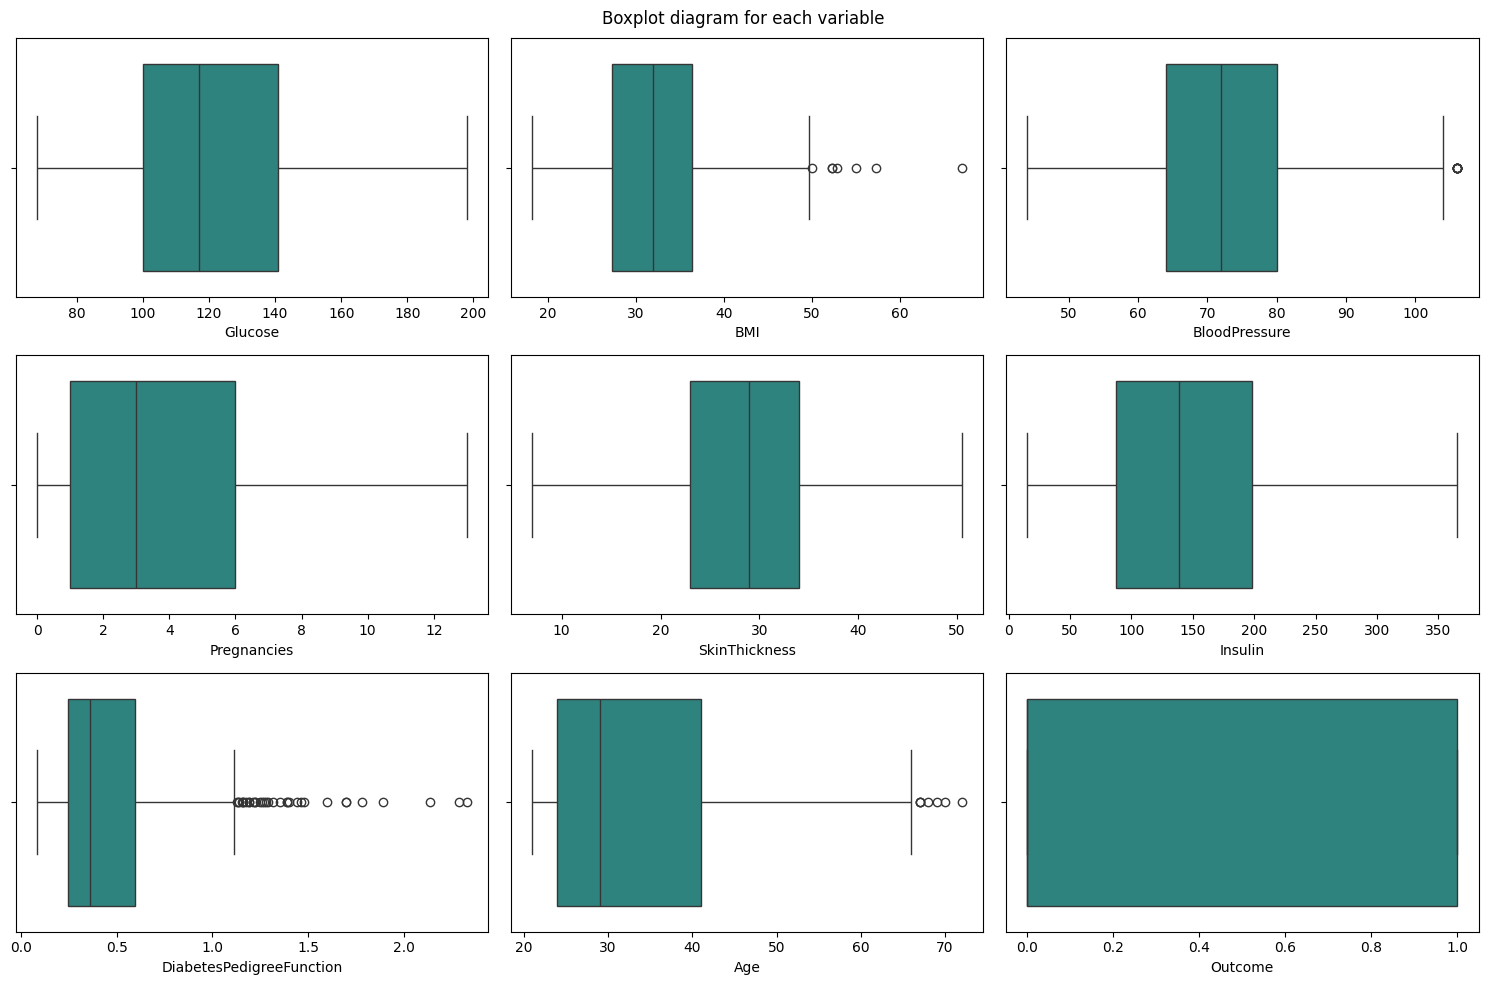

In [34]:
#Another look at the variables after adjusting the outliers
fig1, axes = plt.subplots(3,3, figsize = (15,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(imputed_train_set.columns):
    sns.boxplot(imputed_train_set, x=imputed_train_set[column],ax = axes[i//3,i%3], palette='viridis')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig1.suptitle('Boxplot diagram for each variable')
plt.tight_layout()
plt.show()

### Looking at Correlation between features in the training set

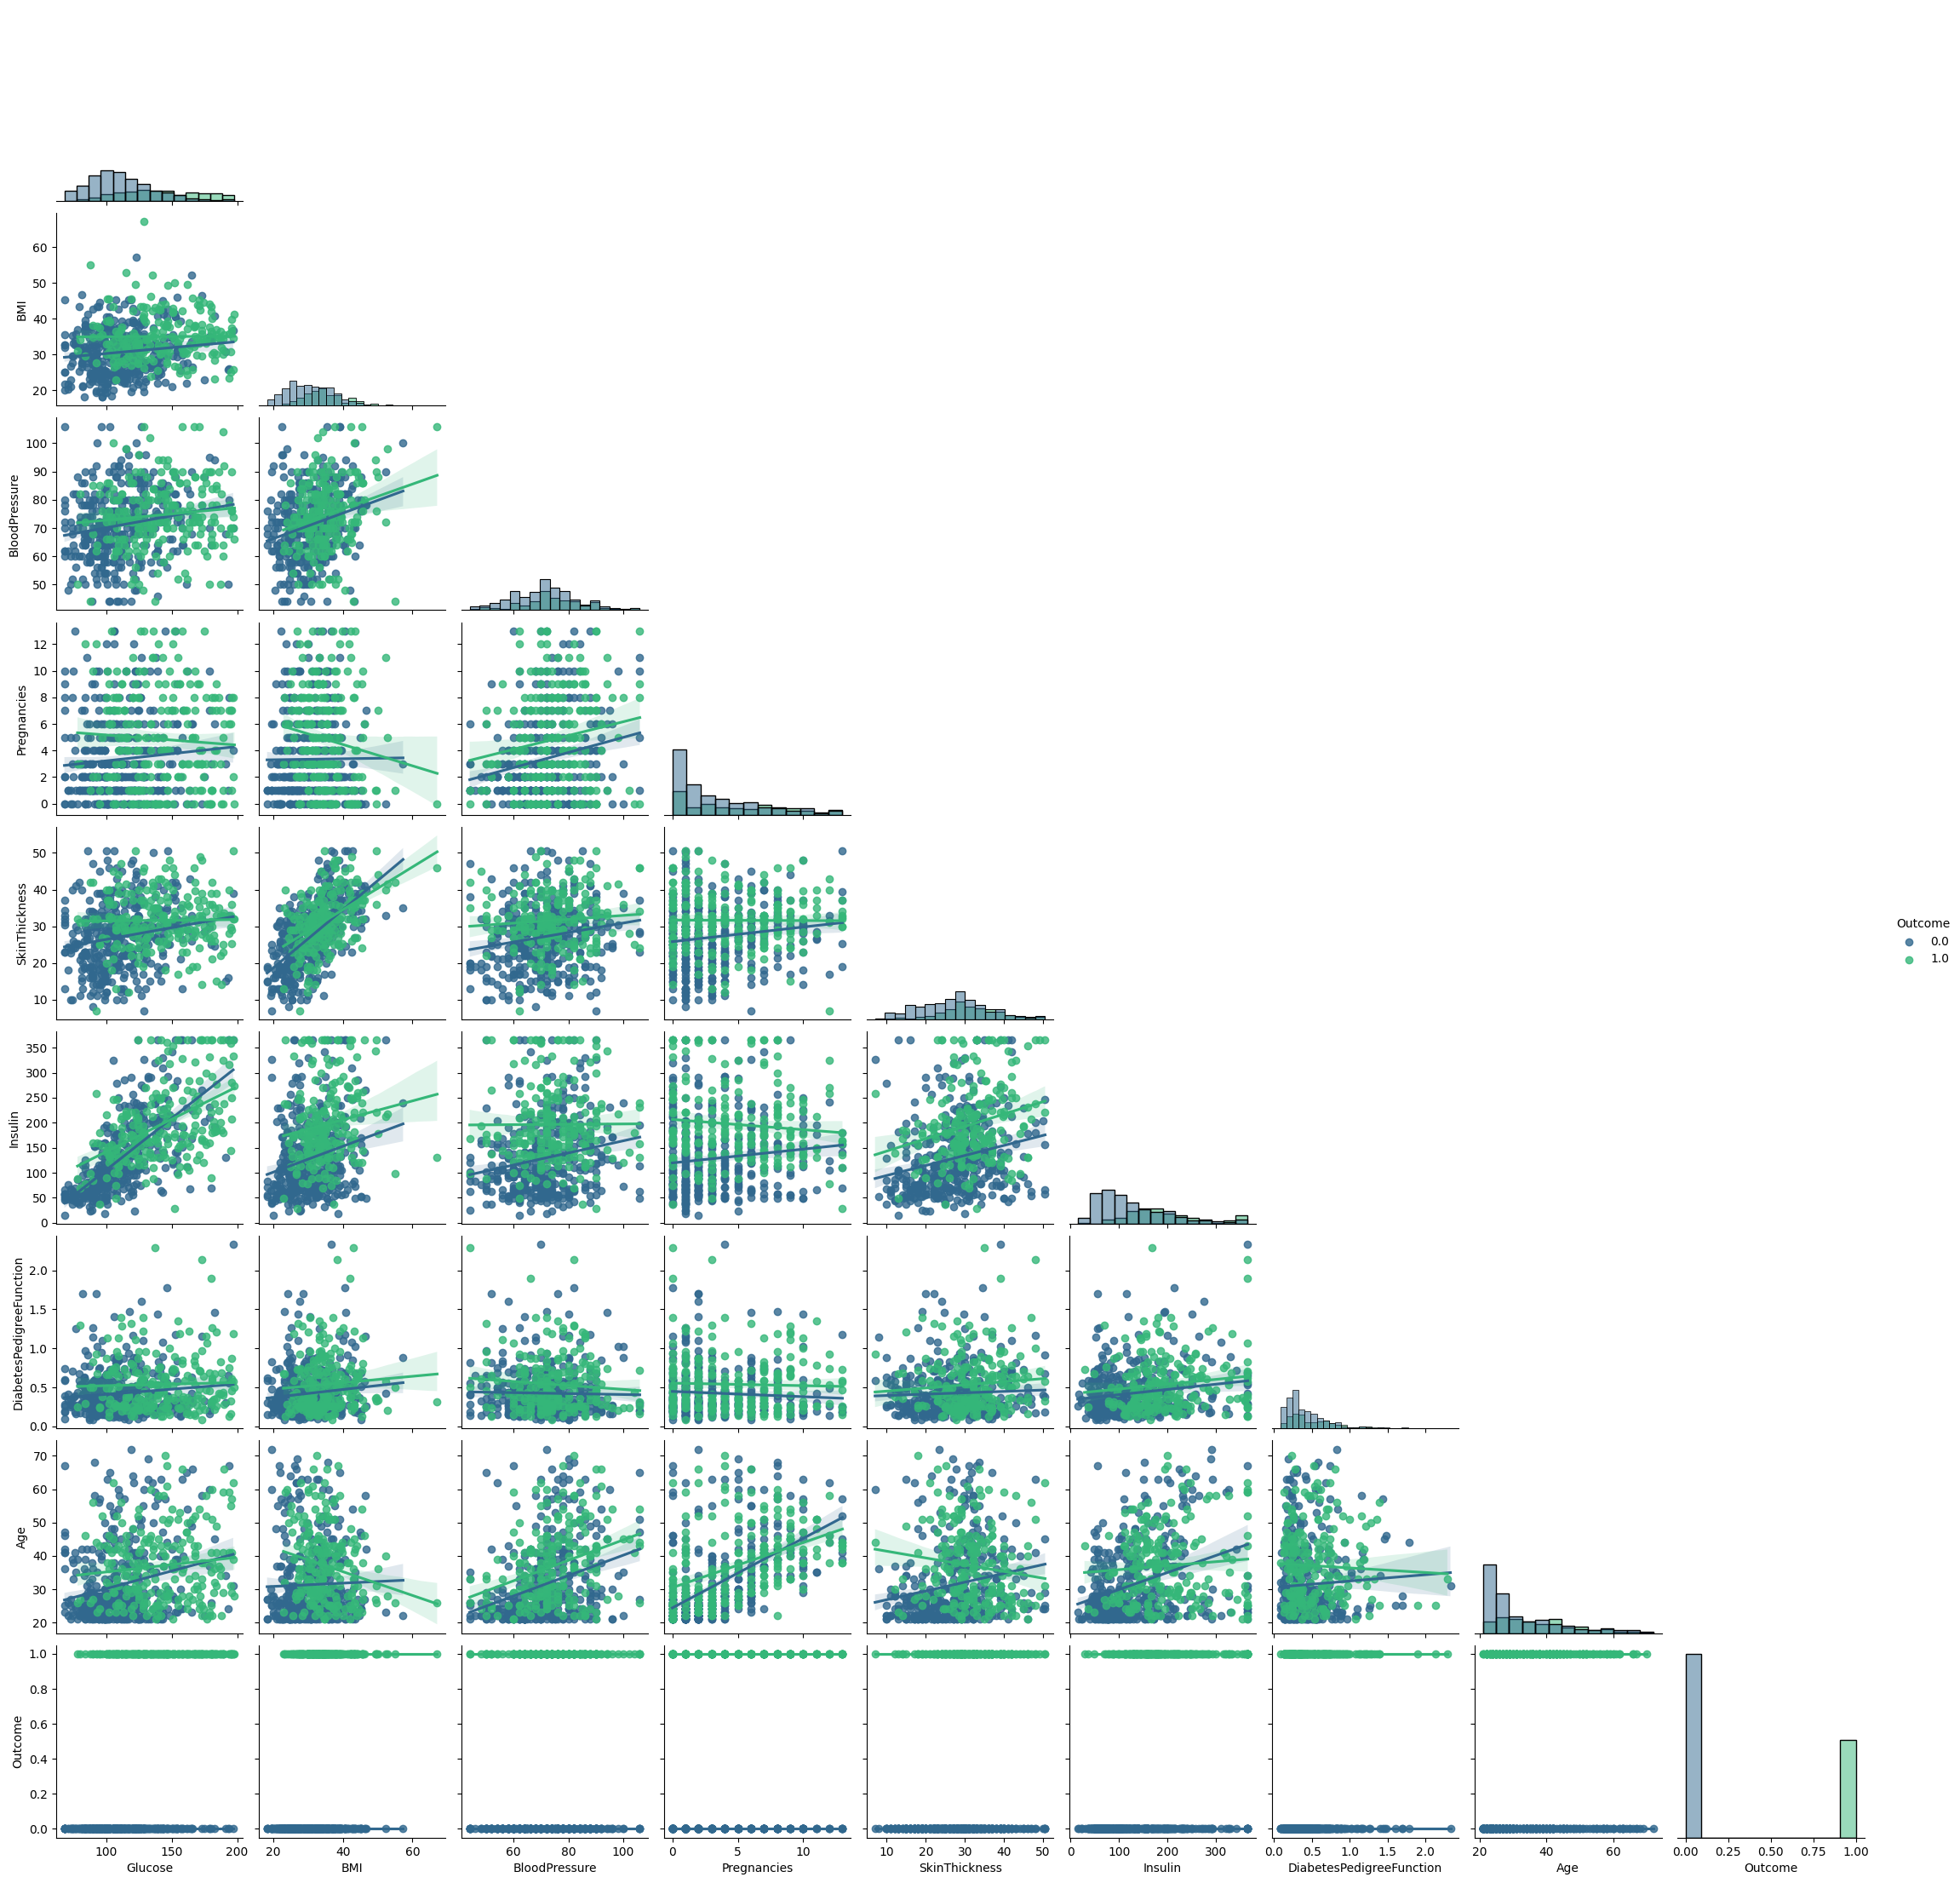

In [35]:
#Pairplot to view relationships between variables
sns.pairplot(data=imputed_train_set, vars= imputed_train_set.columns, hue = 'Outcome', palette = 'viridis', kind='reg', diag_kind='hist', corner=True)
plt.show()

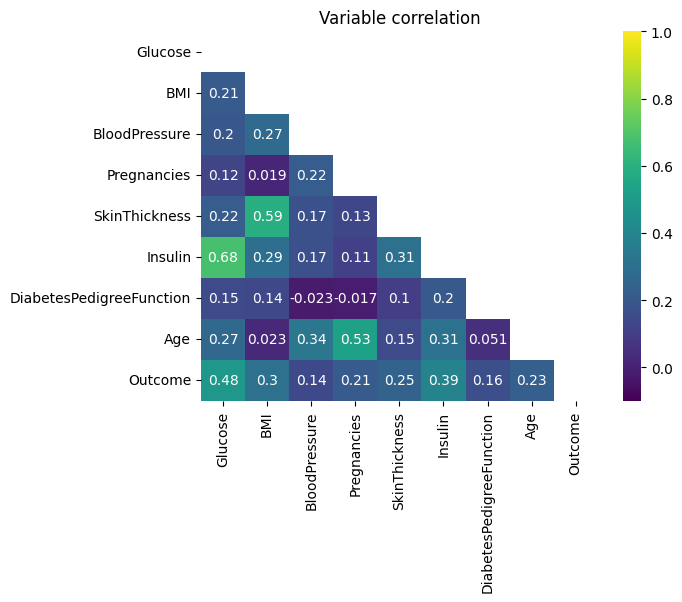

In [36]:
#Plotting a heatmap of the correlation between the features of the training set
mask = np.triu(np.ones_like(imputed_train_set.corr()))
sns.heatmap(imputed_train_set.corr(), annot=True, cmap='viridis', vmin=-0.1, vmax=1, mask=mask)
plt.title('Variable correlation')
plt.show()

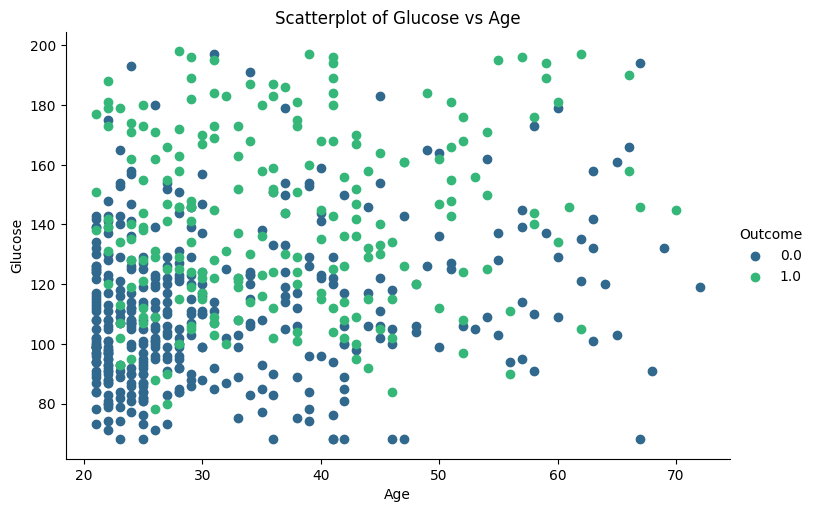

In [37]:
#Plotting relationship between Glucose and Age
facet = sns.FacetGrid(imputed_train_set, hue  = 'Outcome', aspect= 1.5,  height = 5, palette = 'viridis')
facet.map(plt.scatter, 'Age', 'Glucose')
facet.add_legend()
plt.title('Scatterplot of Glucose vs Age')
plt.show()

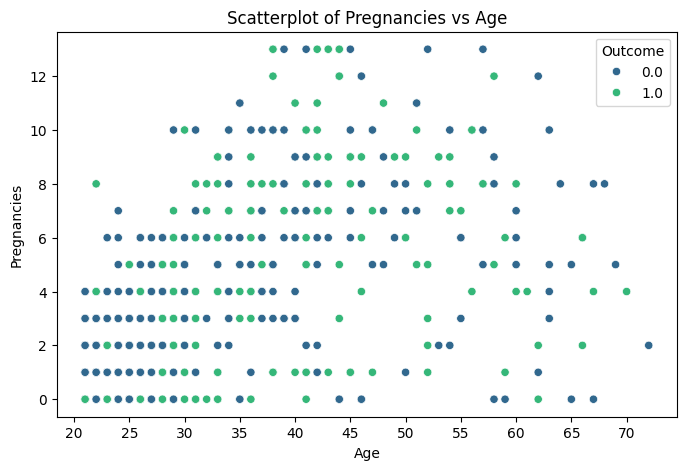

In [38]:
#Plotting relationship between Pregnancies and Age
fig1 = plt.figure(figsize=(8,5))
sns.scatterplot(data=imputed_train_set, x='Age', y='Pregnancies', hue='Outcome', palette='viridis')
plt.xticks(range(20,75,5))
plt.title('Scatterplot of Pregnancies vs Age')
plt.show()

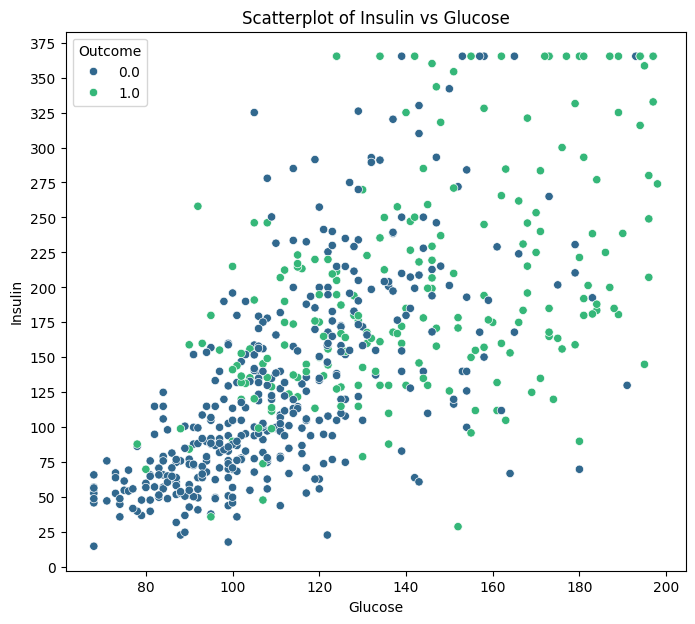

In [39]:
#Plotting relationship between Insulin and Glucose
fig2 = plt.figure(figsize=(8,7))
sns.scatterplot(data=imputed_train_set, x='Glucose', y='Insulin', hue='Outcome', palette='viridis')
plt.yticks(range(0,400,25))
plt.title('Scatterplot of Insulin vs Glucose')
plt.show()

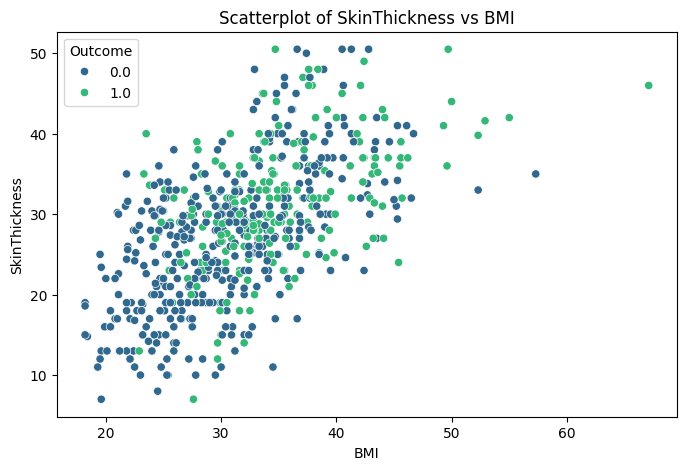

In [40]:
#Plotting relationship between SkinThickness and BMI
fig3 = plt.figure(figsize=(8,5))
sns.scatterplot(data=imputed_train_set, x='BMI', y='SkinThickness', hue='Outcome', palette='viridis')
plt.title('Scatterplot of SkinThickness vs BMI')
plt.show()

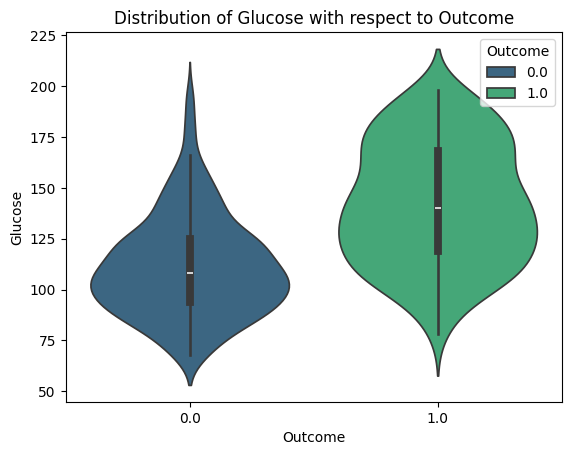

In [41]:
#Plotting distribution of glucose with respect to outcome
sns.violinplot(data=imputed_train_set, y='Glucose', x='Outcome', hue='Outcome', palette='viridis')
plt.title('Distribution of Glucose with respect to Outcome')
plt.show()

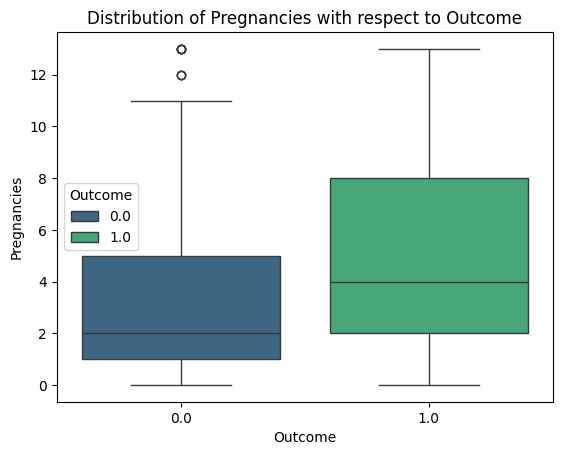

In [42]:
#Plotting distribution of pregnancies with respect to outcome
sns.boxplot(data=imputed_train_set, y='Pregnancies', x='Outcome', hue='Outcome', palette='viridis')
plt.title('Distribution of Pregnancies with respect to Outcome')
plt.show()

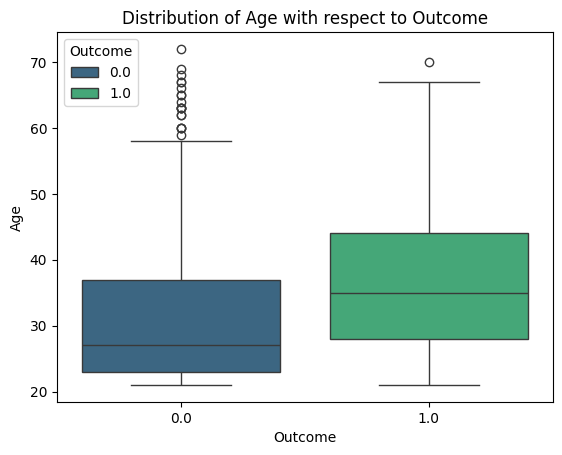

In [43]:
#Plotting distribution of Age with respect to outcome
sns.boxplot(data=imputed_train_set, y='Age', x='Outcome', hue='Outcome', palette='viridis')
plt.title('Distribution of Age with respect to Outcome')
plt.show()

Conclusions:

* Glucose seems to have the most impact on the outcome
* Patients with Age < 29 and Pregnancies < 6 are less likely to be affected with diabetes.
* Patients with both insulin levels > 125 and glucose levels > 120 are more likely to be diabetic
* A high number of diabetic patients have glucose levels 120 and above

## Building the models

In [44]:
#Splitting the training set into X and y components
X_imputed = imputed_train_set.drop('Outcome', axis=1)
y_imputed = imputed_train_set['Outcome']

In [45]:
X_imputed.head()

,Glucose,BMI,BloodPressure,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,145.0,37.9,80.0,9.0,46.0,130.0,0.637,40.0
1,129.0,41.2,62.0,10.0,36.0,176.4,0.441,38.0
2,102.0,37.2,74.0,7.0,40.0,105.0,0.204,45.0
3,120.0,25.0,78.0,8.0,21.4,257.4,0.409,64.0
4,120.0,39.7,76.0,2.0,37.0,105.0,0.215,29.0


In [46]:
# Scaling the X components
scaler = Pipeline([('sc', StandardScaler())])
X_imputed = scaler.fit_transform(X_imputed)

Making use of grid search with different models. Afterwards, I am copying the result to a variable and commenting out the search. This is because a gridsearch is computationally expensive and doesn't need to be run everytime the code is run.

In [47]:
# # Define models and their hyperparameter spaces to carry out a search
# models = {
#     'RandomForest': (RandomForestClassifier(), {
#         'criterion': ['gini', 'log_loss'],
#         'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2,3,4,5]
#     }),
#     'SVC': (SVC(probability=True), {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf', 'sigmoid'],
#         'gamma': [0.1,0.5, 1]
#     }),
#     'Knn': (KNeighborsClassifier(), {
#         "n_neighbors": np.arange(1, 51),
#         "metric": ["manhattan", "euclidean", "chebyshev", 'minkowski', 'hamming'],
#         'p': [1,2,3,4]
#     }),
#     'LSVC': (LinearSVC(), {
#         'tol': [1e-4, 1e-3, 1e-2],
#         'C': [0.1,0.2,0.5, 1.0, 2,4, 10.0],
#         'multi_class': ['ovr', 'crammer_singer'],
#         'fit_intercept': [True, False],
#         'intercept_scaling': [0.5, 1.0, 2.0],
#         'max_iter':[5000]
#     }),
#     'lda': (LinearDiscriminantAnalysis(), {
#         'solver': ['svd', 'lsqr', 'eigen']
#     }),
#     'MLPC': (MLPC(), {
#         'solver': ['lbfgs', 'sgd', 'adam'],
#         'hidden_layer_sizes': [(50,100), (50, 50, 50)],
#         'activation': ['identity', 'logistic', 'tanh', 'relu'],
#         'alpha':[0.0001, 0.001, 0.01, 0.1,0.2],
#         'learning_rate': ['constant', 'invscaling', 'adaptive'],
#         'max_iter': [5000, 6000, 7500]
#     }),
#     'logreg': (LogisticRegression(), {
#         'penalty': ['l2'],
#         'C': [0.1,0.2,0.5, 1.0, 2,4, 10.0],
#         'solver':['liblinear', 'lbfgs', 'saga']
#     }),
#     'Adaboost': (AdaBoostClassifier(),{
#         'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 1],
#         'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'estimator': [DecisionTreeClassifier(max_depth=3), LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()],
#         'random_state': [0,1,42,101]
#     }),
#     'Gradboost': (GradientBoostingClassifier(),{
#         'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 1],
#         'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'max_depth': [1, 2, 3, 4, 5, 6, 7]
#     }),
#     'Dectree': (DecisionTreeClassifier(),{
#         'criterion': ['gini', 'entropy', 'log_loss'],
#         'max_depth': [1,5, 10, 20],
#         'min_samples_split': [2,3,4,5]
#     }),
#     'gpc': (GaussianProcessClassifier(), {
#         'kernel': [RBF(), Matern(), DotProduct()],
#         'optimizer': ['fmin_l_bfgs_b'],
#         'n_restarts_optimizer': [0, 1, 5],
#         'max_iter_predict': [1000, 1500, 2500]
#     }),
#     'gnb': (GaussianNB(), {
#         'var_smoothing': [1e-9, 1e-8, 1e-7]
#     }),
#     'lgbm': (LGBMClassifier(objective='binary', verbose=-1), {
#         'boosting_type': ['gbdt', 'dart', 'goss', 'random_forest'],
#         'learning_rate' : [0.01, 0.02, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.8, 1],
#         'n_estimators' : [50, 100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         #'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#         'min_child_samples': np.arange(1,30,2),
#         'max_depth': [1, 2, 3, 4, 5, 6, 7],
#         'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#         'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
#         'num_leaves': np.arange(1,50),
#         'feature_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#         'bagging_fraction': [0.01, 0.02, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.8,1]
#     }),
#       'ET': (ExtraTreesClassifier(verbose=0, n_jobs=-1, bootstrap=True),{
#         'criterion': ['gini', 'log_loss', 'entropy'],
#         'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'max_depth': [None, 5,10, 20],
#         'min_samples_split': [2,3,4,5,6],
#         'class_weight':[None, 'balanced'],
#         'max_features':['sqrt', 'log2',None],
#         'max_leaf_nodes':np.arange(2,10),
#         'max_samples':np.arange(1,21),
#         'min_samples_leaf':[1,2,3,4,5,6],
#         'random_state':np.arange(0,1000, 5),
#         'warm_start':[False, True]
#       })
# }


# # Perform hyperparameter tuning
# best_params = {}
# tuned_models = {}
# for model_name, (model, param_grid) in models.items():
#     #search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose = 2, error_score='raise', scoring='recall')
#     search = BayesSearchCV(model, search_spaces=param_grid, cv=5, verbose = 2, error_score='raise', scoring='recall')
#     #search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, error_score='raise', scoring='recall')
#     search.fit(X_imputed, y_imputed)
#     #clf_pipeline.fit(X_imputed, y_imputed)
#     best_params[model_name] = search.best_params_
#     tuned_models[f"{model_name}_model"] = model.set_params(**best_params[model_name])
#     #print (tuned_models)
#     # my_var = f"{model_name}_model"
#     # my_var = model(**best_params[model_name])
#     # tuned_models.append(my_var)

# print(best_params)

# #Displaying the tuned models and their parameters
# print(tuned_models)

In [48]:
#Storing the tuned models as a dictionary
final_models = {'RandomForest_model': RandomForestClassifier(class_weight='balanced', criterion='log_loss',max_depth=10, min_samples_split=5, n_estimators=400),
                'LSVC_model': LinearSVC(C=0.5, fit_intercept=False, intercept_scaling=2.0, max_iter=5000,tol=0.01),
                'logreg_model': LogisticRegression(class_weight='balanced', C=0.5, solver='liblinear'),
                'Knn_model': KNeighborsClassifier(n_neighbors=13, p=4),
                'Adaboost_model': AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=1, min_samples_split=4), learning_rate=0.04, n_estimators=2000, random_state=42),
                'lgbm_model': LGBMClassifier(class_weight='balanced', bagging_fraction=0.4, feature_fraction=0.7, learning_rate=0.08,max_depth=6, min_child_samples=15, n_estimators=500,
               num_leaves=19, objective='binary', reg_alpha=5, reg_lambda=20,verbose=-1)

}

In [49]:
# Writing a function to calculate the specificity value for cross validation
def spec(clf, X, y):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  tn = cm[0, 0]
  fp = cm[0, 1]
  fn = cm[1, 0]
  tp = cm[1, 1]
  specificity = tn/(tn+fp)
  #sensitivity = tp/(tp+fn)
  return specificity

Cross validating the models with 10-fold cross validation to see how well they will perform

In [50]:
#Carrying out cross validation and displaying the score for each model
score_list={}
for model in final_models.values():
    kfold = StratifiedKFold(n_splits=10)
    score = cross_validate(model,  X_imputed, y_imputed, cv=kfold, scoring={'accuracy':'accuracy', 'specificity':spec, 'recall':'recall'})
    #Outputting only the mean of the accuracy of the 10 splits
    score_list[f"{model.__class__.__name__}"]=score


# Storing the scores in a list so it can be displayed as a dataframe
scoring = []
for name, metric_list in score_list.items():
    single_scores = {}
    for metric, scores in metric_list.items():
        single_scores['Model']= name
        single_scores[metric]=scores.mean()
    scoring.append(single_scores)
print(scoring)

[{'Model': 'RandomForestClassifier', 'fit_time': 1.011702537536621, 'score_time': 0.0531825065612793, 'test_accuracy': 0.7457958751983077, 'test_specificity': 0.7753658536585365, 'test_recall': 0.6896103896103896}, {'Model': 'LinearSVC', 'fit_time': 0.009263181686401367, 'score_time': 0.004194927215576172, 'test_accuracy': 0.7360655737704919, 'test_specificity': 0.7081097560975609, 'test_recall': 0.7883116883116883}, {'Model': 'LogisticRegression', 'fit_time': 0.0021941423416137694, 'score_time': 0.004000091552734375, 'test_accuracy': 0.7458751983077737, 'test_specificity': 0.7654878048780487, 'test_recall': 0.7088744588744589}, {'Model': 'KNeighborsClassifier', 'fit_time': 0.0016293048858642579, 'score_time': 0.02592177391052246, 'test_accuracy': 0.7297197250132206, 'test_specificity': 0.8278658536585366, 'test_recall': 0.5448051948051947}, {'Model': 'AdaBoostClassifier', 'fit_time': 6.5882137537002565, 'score_time': 0.6480448722839356, 'test_accuracy': 0.7477260708619778, 'test_speci

In [51]:
# Displaying the results of the cross validation as a dataframe
crossval=pd.DataFrame(scoring).sort_values(by=['test_recall', 'test_accuracy'], ascending=False).reset_index().drop('index', axis=1)
crossval

,Model,fit_time,score_time,test_accuracy,test_specificity,test_recall
0,LinearSVC,0.009263,0.004195,0.736066,0.708110,0.788312
1,LGBMClassifier,0.063461,0.007732,0.742570,0.727988,0.770563
2,AdaBoostClassifier,6.588214,0.648045,0.747726,0.748110,0.747186
3,LogisticRegression,0.002194,0.004000,0.745875,0.765488,0.708874
4,RandomForestClassifier,1.011703,0.053183,0.745796,0.775366,0.689610
5,KNeighborsClassifier,0.001629,0.025922,0.729720,0.827866,0.544805


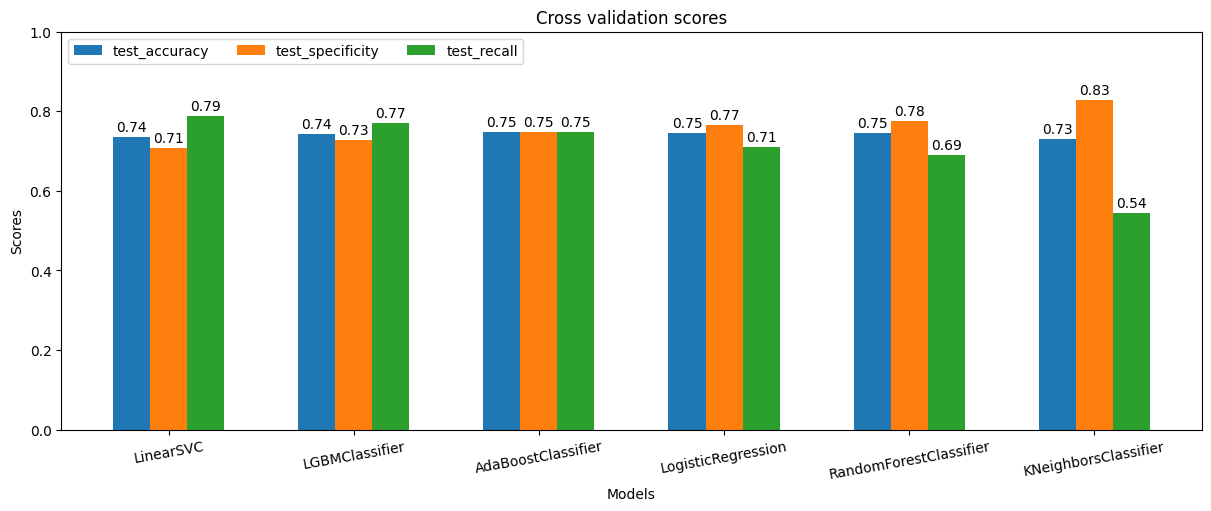

In [52]:
#Plotting the cross-validation scores
x = np.arange(len(crossval))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,5))

for col in crossval.columns[3:]:
    offset = width * multiplier
    rects = ax.bar(x + offset, crossval[col], width, label=col)
    ax.bar_label(rects, padding=2, fmt='%.2f', label_type='edge')
    multiplier += 1

# Customizing the chart with labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Cross validation scores')
ax.set_xticks(x + width, crossval['Model'], rotation=10)
ax.legend(loc='upper left', ncols=7)
ax.set_ylim(0, 1.0)

plt.show()

## Model Evaluation and Comparative Analysis

After cross validations are done, evaluating the model performance on the actual test data is next

In [53]:
#Carrying out pre-processing steps on the test set
testing_set = convert(clean(test_set))

#Adjusting outliers in the test set
testing_set = testing_set.apply(outliers, axis=0)

#Splitting the training set into X and y components
X_test_imp = testing_set.iloc[:,:-1]
y_test_imp = testing_set.iloc[:,-1]


In [54]:
# Writing a function to calculate the specificity value
def specificity(y_pred, y_test):
  cm = confusion_matrix(y_pred, y_test)
  tn = cm[0, 0]
  fp = cm[0, 1]
  fn = cm[1, 0]
  tp = cm[1, 1]
  spec = tn/(tn+fp)
  return spec

In [55]:
#Validating the list of models with the test data
model_eval = []
for clf in final_models.values():
    clf.fit(X_imputed, y_imputed)
    y_pred1 = clf.predict(scaler.transform(X_test_imp))

    #Storing the relevant metrics in a dictionary
    eval={}
    eval['Model'] = clf.__class__.__name__
    eval['Accuracy']= round(accuracy_score(y_test_imp, y_pred1), 3)
    eval['Specificity']= round(specificity(y_test_imp, y_pred1), 3)
    eval['Recall/Sensitivity']= round(recall_score(y_test_imp, y_pred1), 3)
    eval['Precision'] = round(precision_score(y_test_imp, y_pred1), 3)
    eval['F1 score'] = round(f1_score(y_test_imp, y_pred1), 3)
    eval['cm'] = confusion_matrix(y_test_imp, y_pred1)
    model_eval.append(eval)

    # Displaying the results for each model
    print(f'Results for {clf.__class__.__name__} \n')
    print(f'Accuracy Score: {accuracy_score(y_test_imp, y_pred1):.2f}')
    print(f'Specificity Score: {specificity(y_test_imp, y_pred1):.2f}')
    print(f'Recall Score: {recall_score(y_test_imp, y_pred1):.2f}')
    print(f'F1 score:{f1_score(y_test_imp, y_pred1):.2f}')
    print(f'Classification Report \n{classification_report(y_test_imp, y_pred1)}')
    print(f'Confusion Matrix \n{confusion_matrix(y_test_imp, y_pred1)}')
    print(' \n')

Results for RandomForestClassifier 

Accuracy Score: 0.79
Specificity Score: 0.85
Recall Score: 0.67
F1 score:0.69
Classification Report 
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84        99
         1.0       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix 
[[84 15]
 [18 37]]
 

Results for LinearSVC 

Accuracy Score: 0.77
Specificity Score: 0.73
Recall Score: 0.84
F1 score:0.72
Classification Report 
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80        99
         1.0       0.63      0.84      0.72        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.77      0.77       154

Confusion Matrix 
[[72 27]
 [ 9 46]]
 

Res

In [56]:
#Converting the dictionary of evaluation metrics to a dataframe
model_scores = pd.DataFrame(model_eval).sort_values(by=['Recall/Sensitivity', 'Accuracy'], ascending=False).reset_index().drop('index', axis=1)

#Extracting the single evaluation scores
model_scores_only = model_scores.drop('cm', axis=1)

#Extracting the confusion matrix for each model
model_matrix = model_scores[['Model', 'cm']]

#Displaying the single evaluation metrics of each model
model_scores_only

,Model,Accuracy,Specificity,Recall/Sensitivity,Precision,F1 score
0,LinearSVC,0.766,0.727,0.836,0.630,0.719
1,LGBMClassifier,0.786,0.808,0.745,0.683,0.713
2,LogisticRegression,0.779,0.798,0.745,0.672,0.707
3,AdaBoostClassifier,0.779,0.798,0.745,0.672,0.707
4,RandomForestClassifier,0.786,0.848,0.673,0.712,0.692
5,KNeighborsClassifier,0.818,0.909,0.655,0.800,0.720


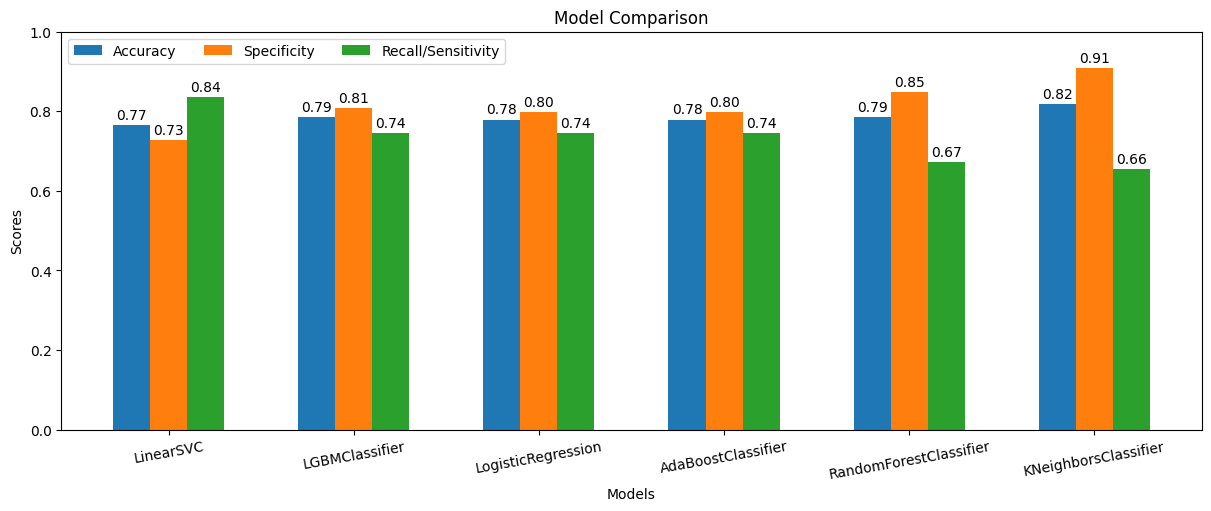

In [57]:
#Plotting the evaluation scores all models
x = np.arange(len(model_scores_only))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,5))
#colors=['red', 'orange', 'black']

for i in model_scores_only.columns[1:4]:
    offset = width * multiplier
    rects = ax.bar(x + offset, model_scores_only[i], width, label=i)
    ax.bar_label(rects, padding=2, fmt='%.2f', label_type='edge')
    multiplier += 1

# Customizing the chart with labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Model Comparison')
ax.set_xticks(x + width, model_scores_only['Model'], rotation=10)
ax.legend(loc='upper left', ncols=7)
ax.set_ylim(0, 1.0)

plt.show()

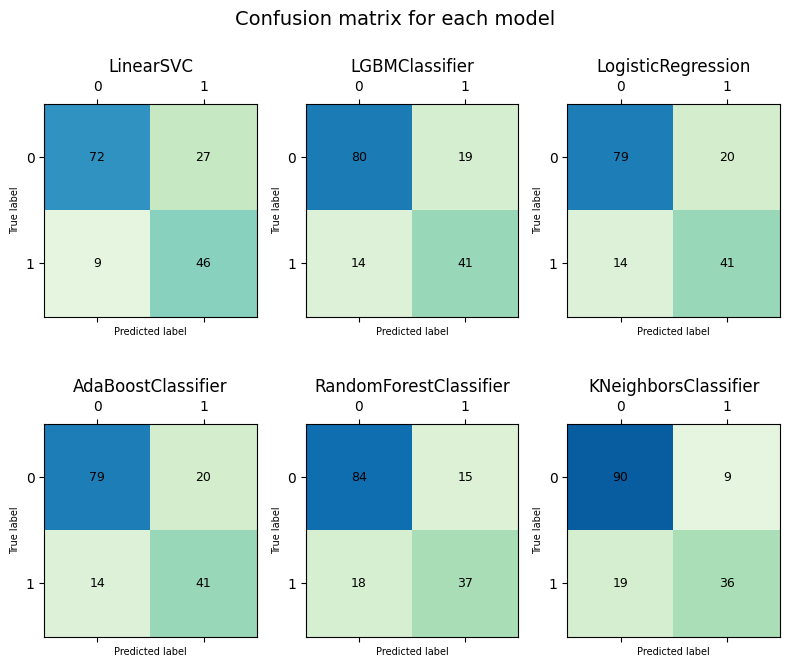

In [58]:
#Plotting the confusion matrix for each model
from matplotlib.text import Text
fig, axes = plt.subplots(2,3, figsize = (8,7))

#Using a for loop to create subplots for each variable
for i, row in model_matrix.iterrows():
    model_name = row['Model']
    cm = row['cm']
    ax=axes.flat[i]
    ax.matshow(cm, cmap = 'GnBu', vmin=0, vmax=99)

    ax.set_xlabel('Predicted label', fontsize=7)
    ax.set_ylabel('True label', fontsize=7)
    ax.set_title(model_name, fontweight=3)

    # Adding text in the matrices
    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            cell_value = cm[y, x]
            text = Text(x, y, f"{cell_value}", ha='center', va='center', color='black', fontsize=9)
            ax.add_artist(text)

fig.suptitle('Confusion matrix for each model', fontsize=14)
plt.tight_layout()
plt.show()

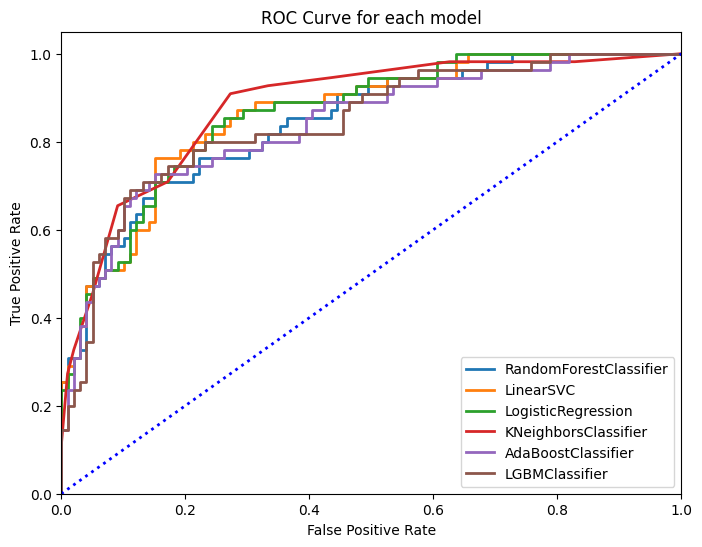

In [59]:
#Plotting the ROC curve for all models

plt.figure(figsize=(8,6))
for name, clf in final_models.items():
    if name is 'LSVC_model':
        fpr, tpr, threshold = roc_curve(y_test_imp, clf.decision_function(scaler.transform(X_test_imp)))
    else:
        fpr, tpr, thresholds = roc_curve(y_test_imp, clf.predict_proba(scaler.transform(X_test_imp))[:,1])
    plt.plot(fpr, tpr, label=f'{clf.__class__.__name__}', lw=2)
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=2, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

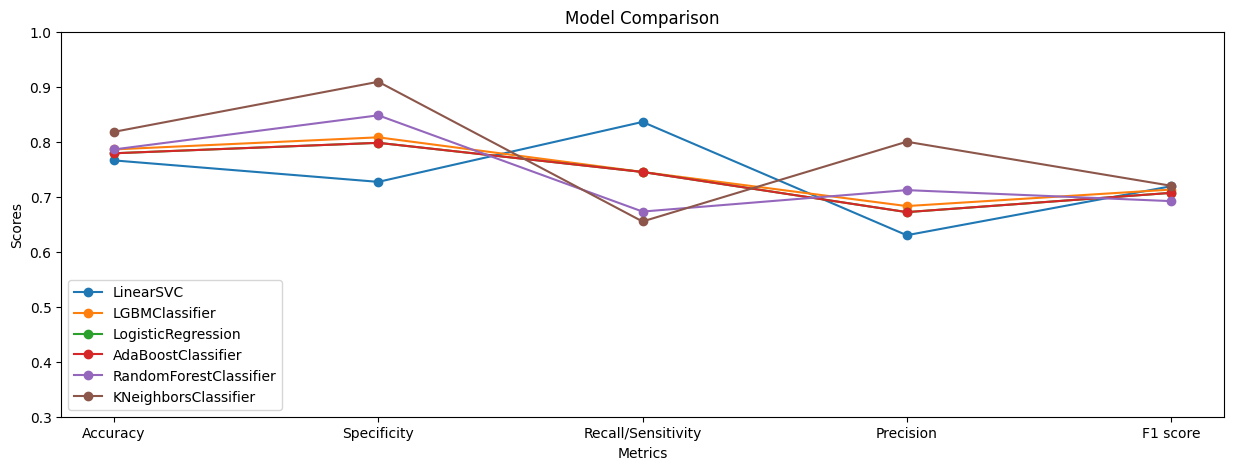

In [60]:
#Plotting a line plot to compare the model scores
plt.figure(figsize=(15,5))

for item, row in model_scores_only.iterrows():   #
  plt.plot(model_scores_only.columns[1:], row[1:], marker='o', label=row['Model'])

# Customizing the chart with labels and titles
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.title('Model Comparison')
plt.ylim(0.3,1)
plt.legend(loc='best')

plt.show()

## Recommended model

From the results above, the best performing model is LinearSVC with respect to Recall/Sensitivity. However, it isn't doing too well with respect to accuracy and specificity.
Our results can be made better if the models are combined with an ensemble model.

In [61]:
#Creating ensemble model
voting_classifier = VotingClassifier(estimators=[('lgbm',final_models['lgbm_model']), ('knn',KNeighborsClassifier(n_neighbors=5, metric='manhattan'))], voting='soft', verbose=False)

#Fitting ensemble model to data
voting_classifier.fit(X_imputed,y_imputed)

# Making predictions with ensemble model
ensemble_predictions = voting_classifier.predict(scaler.transform(X_test_imp))

# Evaluating ensemble performance
ensemble_accuracy = accuracy_score(y_test_imp, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")
print(f"Ensemble Recall: {recall_score(y_test_imp, ensemble_predictions):.2f}")
print(f"Ensemble Specificity: {specificity(y_test_imp, ensemble_predictions):.2f}")
print(confusion_matrix(y_test_imp, ensemble_predictions))
print('\n')
print(classification_report(y_test_imp, ensemble_predictions))

Ensemble Accuracy: 0.84
Ensemble Recall: 0.80
Ensemble Specificity: 0.87
[[86 13]
 [11 44]]


              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        99
         1.0       0.77      0.80      0.79        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.85      0.84      0.84       154



Based on the analysis above, I would recommend using the Voting Classifier Ensemble model as it combines the performance of the models and gives a more balanced result

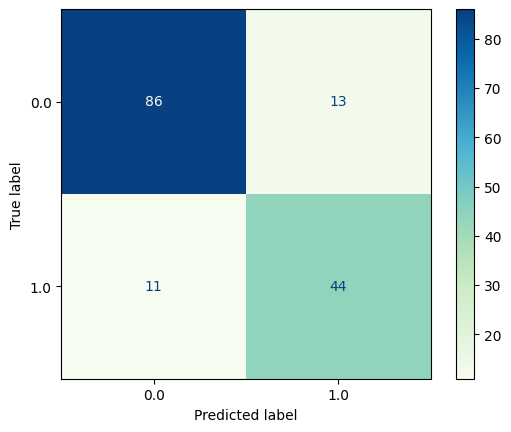

In [62]:
#Plotting the confusion matrix for the voting classifier
ConfusionMatrixDisplay.from_predictions(y_test_imp, ensemble_predictions, cmap='GnBu')
plt.show()

ROC AUC Score is 0.83


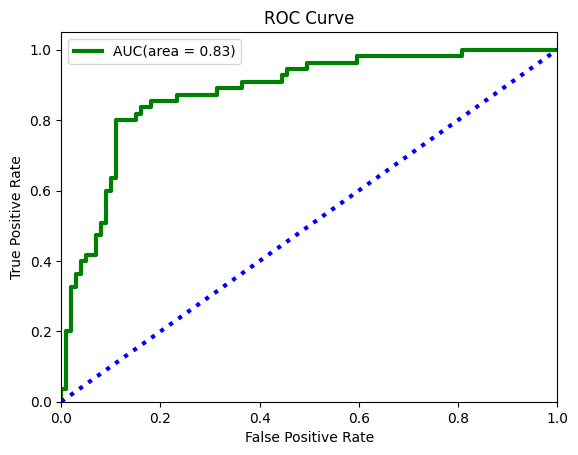

In [63]:
#Displaying the ROC AUC Score
ensemble_roc = roc_auc_score(y_test_imp, ensemble_predictions)
print(f'ROC AUC Score is {ensemble_roc:.2f}')

#Plotting the ROC curve of the ensemble model
fpr, tpr, thresholds = roc_curve(y_test_imp, voting_classifier.predict_proba(scaler.transform(X_test_imp))[:,1])
fig = plt.figure()
plt.plot(fpr, tpr, label='AUC(area = %0.2f)' % ensemble_roc, lw=3, color='green')
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=3, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [64]:
# Checking the total time it took to run the code
print(f'{time.time() - start_time}' + ' s')

197.3175573348999 s


# Thank you!!!